# Magic Gamma telescope readings

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

## Reading the dataset into python

In [ ]:
df = pd.read_csv('/content/magic_gamma_telescope04_sample.csv')
df.head()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df['class'].value_counts()

g    2183
h    2104
Name: class, dtype: int64

The class is mostly even between gamma and hadron classes

In [ ]:
df.describe()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist
count,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000
mean,57.716420,24.135054,2.849275,0.375352,0.212399,-8.742164,7.314128,0.642312,31.757071,195.702966
std,47.897591,21.823325,0.472802,0.181586,0.110284,66.928938,56.577545,24.176600,27.188376,76.210147
min,7.360600,0.000000,1.991600,0.013100,0.000300,-382.594000,-318.300200,-205.894700,0.000000,5.745600
25%,24.587650,11.904000,2.501100,0.232650,0.126450,-25.685900,-15.003250,-10.895600,7.439800,142.827500
50%,38.875400,17.389500,2.757400,0.352600,0.196000,1.845800,14.907700,1.910700,23.821000,193.740000
75%,75.201750,26.154050,3.131400,0.503000,0.285400,23.421500,34.763650,11.382700,53.004700,242.893700
max,334.177000,256.382000,5.323300,0.893000,0.628300,575.240700,238.321000,179.851000,90.000000,450.953000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flength   4287 non-null   float64
 1   fwidth    4287 non-null   float64
 2   fsize     4287 non-null   float64
 3   fconc     4287 non-null   float64
 4   fconc1    4287 non-null   float64
 5   fsym      4287 non-null   float64
 6   fm3long   4287 non-null   float64
 7   fm3trans  4287 non-null   float64
 8   falpha    4287 non-null   float64
 9   dist      4287 non-null   float64
 10  class     4287 non-null   object 
dtypes: float64(10), object(1)
memory usage: 368.5+ KB


No null values or type problems

In [ ]:
X = df.drop('class', axis=1).values
y = df['class'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [ ]:
scale = MinMaxScaler()

In [ ]:
train_fit = scale.fit(X_train)

In [ ]:
X_train = train_fit.transform(X_train)
X_test = train_fit.transform(X_test)

## Label Encoding

In [ ]:
le = LabelEncoder()
y_en = le.fit_transform(y)
y_train_en = le.fit_transform(y_train)
y_test_en = le.fit_transform(y_test)

In [ ]:
X_train.shape, X_test.shape

((3429, 10), (858, 10))

## Model Evaluation
Building an initial ANN model randomly to assess performance. Using two hidden layers with 16 neurons each.

In [ ]:
model = Sequential()

model.add(Dense(16, input_shape=(10,), activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [ ]:
model.fit(X_train, y_train_en, batch_size=12, epochs=100, 
          validation_data=(X_test, y_test_en), callbacks=[early_stop])

Epoch 1/100
286/286 [==============================] - 4s 4ms/step - loss: 0.6241 - accuracy: 0.6815 - val_loss: 0.5453 - val_accuracy: 0.7739
Epoch 2/100
286/286 [==============================] - 1s 3ms/step - loss: 0.5056 - accuracy: 0.7714 - val_loss: 0.4873 - val_accuracy: 0.7774
Epoch 3/100
286/286 [==============================] - 1s 3ms/step - loss: 0.4702 - accuracy: 0.7781 - val_loss: 0.4642 - val_accuracy: 0.7867
Epoch 4/100
286/286 [==============================] - 1s 3ms/step - loss: 0.4507 - accuracy: 0.7877 - val_loss: 0.4504 - val_accuracy: 0.7914
Epoch 5/100
286/286 [==============================] - 1s 3ms/step - loss: 0.4350 - accuracy: 0.7915 - val_loss: 0.4386 - val_accuracy: 0.7902
Epoch 6/100
286/286 [==============================] - 1s 3ms/step - loss: 0.4248 - accuracy: 0.8002 - val_loss: 0.4367 - val_accuracy: 0.7972
Epoch 7/100
286/286 [==============================] - 1s 3ms/step - loss: 0.4206 - accuracy: 0.8029 - val_loss: 0.4179 - val_accuracy: 0.8019

In [ ]:
ann_metrics = pd.DataFrame(model.history.history)
ann_metrics

,loss,accuracy,val_loss,val_accuracy
0,0.624083,0.681540,0.545299,0.773893
1,0.505550,0.771362,0.487323,0.777389
2,0.470151,0.778069,0.464228,0.786713
3,0.450671,0.787693,0.450390,0.791375
4,0.435048,0.791484,0.438554,0.790210
5,0.424831,0.800233,0.436658,0.797203
6,0.420646,0.802858,0.417920,0.801865
7,0.414392,0.811607,0.422423,0.787879
8,0.410124,0.808691,0.416616,0.792541
9,0.406077,0.817731,0.414396,0.793706


### Evaluating Loss

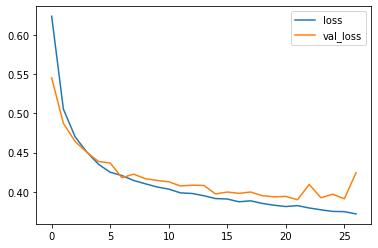

In [ ]:
ann_metrics[['loss', 'val_loss']].plot()

### Evaluating Accuracy

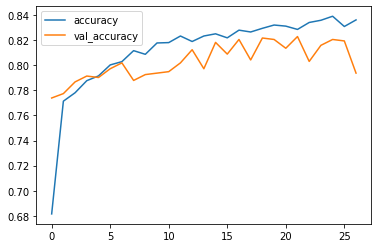

In [ ]:
ann_metrics[['accuracy', 'val_accuracy']].plot()

The model has reached limit and would over fit on further epochs. Validation and train loss moving down togther is good indication

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

In [ ]:
print(classification_report(y_test_en, predictions))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       461
           1       0.74      0.86      0.79       397

    accuracy                           0.79       858
   macro avg       0.80      0.80      0.79       858
weighted avg       0.80      0.79      0.79       858



In [ ]:
confusion_matrix(y_test_en, predictions)

array([[339, 122],
       [ 55, 342]])

In [ ]:
accuracy_score(y_test_en, predictions)

0.7937062937062938

In [ ]:
f1_score(y_test_en, predictions)

0.7944250871080138

Just an initial model gave 79.37% accuracy and 79.44% f-1 score. Initial objectives completed.

## Hyperparameter Tuning
We use grid search with a sklearn wrapper of keras called scikeras

In [ ]:
def create_model(neurons, dropout_rate, optimizer='adam'):

	model = Sequential()
	model.add(Dense(neurons, input_shape=(10,), activation='relu'))
	model.add(Dropout(dropout_rate))
	model.add(Dense(1, activation='sigmoid'))
 
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

In [ ]:
optimizer = ['SGD', 'RMSprop', 'Adam']
dropout_rate = [0.2, 0.3, 0.4, 0.5]
neurons = [15, 20, 25, 30]

param_grid = dict(model__optimizer=optimizer, model__dropout_rate=dropout_rate, 
                  model__neurons=neurons)

In [ ]:
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y_en)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.806158 using {'model__dropout_rate': 0.2, 'model__neurons': 25, 'model__optimizer': 'RMSprop'}
0.731747 (0.013146) with: {'model__dropout_rate': 0.2, 'model__neurons': 15, 'model__optimizer': 'SGD'}
0.796594 (0.005752) with: {'model__dropout_rate': 0.2, 'model__neurons': 15, 'model__optimizer': 'RMSprop'}
0.798227 (0.006573) with: {'model__dropout_rate': 0.2, 'model__neurons': 15, 'model__optimizer': 'Adam'}
0.748542 (0.006294) with: {'model__dropout_rate': 0.2, 'model__neurons': 20, 'model__optimizer': 'SGD'}
0.798227 (0.009803) with: {'model__dropout_rate': 0.2, 'model__neurons': 20, 'model__optimizer': 'RMSprop'}
0.801959 (0.009441) with: {'model__dropout_rate': 0.2, 'model__neurons': 20, 'model__optimizer': 'Adam'}
0.756473 (0.012295) with: {'model__dropout_rate': 0.2, 'model__neurons': 25, 'model__optimizer': 'SGD'}
0.806158 (0.005079) with: {'model__dropout_rate': 0.2, 'model__neurons': 25, 'model__optimizer': 'RMSprop'}
0.801726 (0.008747) with: {'model__dropout_rate': 0

We were able to improve accuracy upto 80%.